In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

train_df_org = pd.read_csv('kaggle/input/digit-recognizer/train.csv',  nrows=1000)
test_df_org = pd.read_csv('kaggle/input/digit-recognizer/test.csv',  nrows=1000)

# train_df_for_tsne = train_df_org.drop(['label'], axis=1)
# train_df_for_tsne = train_df_org
train_df_for_tsne = StandardScaler().fit_transform(train_df_org)
train_df_org_label = train_df_org['label']


train_df_org.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [36]:
test_df_org.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 784 columns]

In [37]:
tsne = TSNE(n_components=2, random_state=0)
mnist_tsne = tsne.fit_transform(train_df_for_tsne)

mnist_tsne = np.vstack((mnist_tsne.T, train_df_org_label)).T
tsne_df = pd.DataFrame(data=mnist_tsne, columns=('Dim_1', 'Dim_2', 'Label'))

tsne_df.head()

Dim_1      Dim_2  Label
0   3.193196  -1.728171    1.0
1 -42.094837  17.451714    0.0
2  18.940496  10.338684    1.0
3   5.413895 -30.402338    4.0
4 -45.575104  18.657940    0.0

/home/paul/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


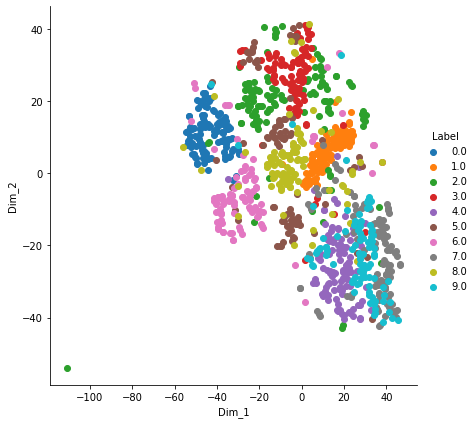

In [38]:
sns.FacetGrid(tsne_df, hue='Label', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()